# Big Data 2 

# Case Study 2: Review to Results

In [47]:
# Importing libraries 
import pandas as pd
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from collections import Counter
from tabulate import tabulate
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from collections import Counter
from nltk import bigrams
import re

# Reading excel file
df = pd.read_csv('sentiment_train.csv')
df.head()

,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [57]:
# Checking null values and Removing unwanted rows 
df.isnull().sum()
df=df[df["Sentence"]!= "#NAME?"] 

In [4]:
df.describe(include = "all")

,Sentence,Polarity
count,2400,2400.000000
unique,2382,NaN
top,#NAME?,NaN
freq,4,NaN
mean,NaN,0.494583
std,NaN,0.500075
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


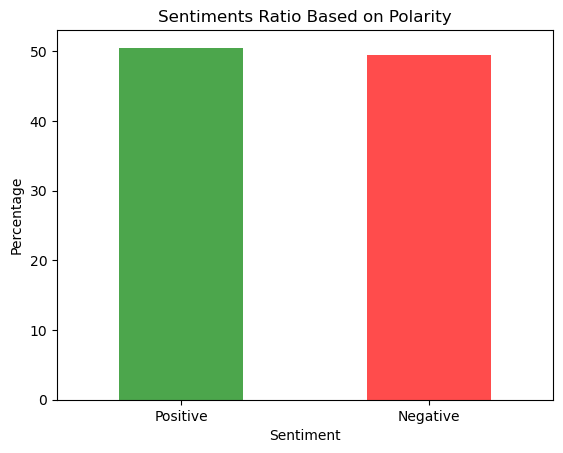

In [5]:
# Calculating sentiments based on polarity
sentiments_ratio = df['Polarity'].value_counts(normalize=True) * 100

# Plotting the sentiments ratio
colors = ['green', 'red']
labels = ['Positive', 'Negative']
sentiments_ratio.plot(kind='bar', color=colors, alpha=0.7)
plt.title('Sentiments Ratio Based on Polarity')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)
plt.show()

# WordCloud

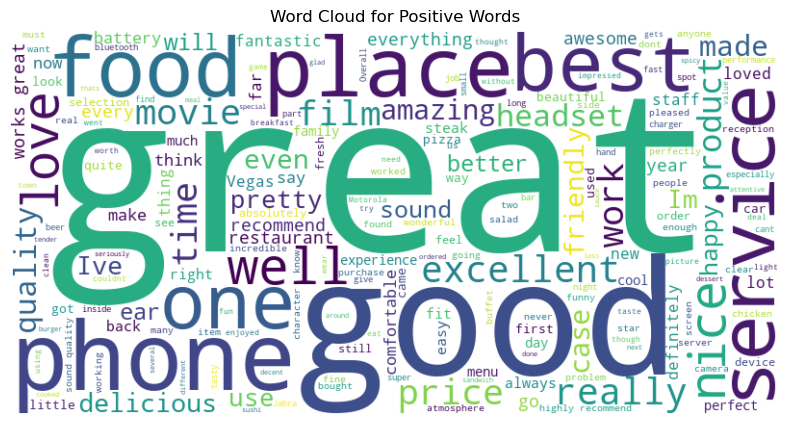

In [53]:
# Filtering the negative sentences
negative_sentences = df[df['Polarity'] == 1]['Sentence']

# Pre-processing text: Removing spaces, special characters, punctuation, and errors
preprocessed_text = ' '.join(negative_sentences)
preprocessed_text = re.sub(r'[^a-zA-Z\s]', '', preprocessed_text)

# Generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(preprocessed_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Words')
plt.show()

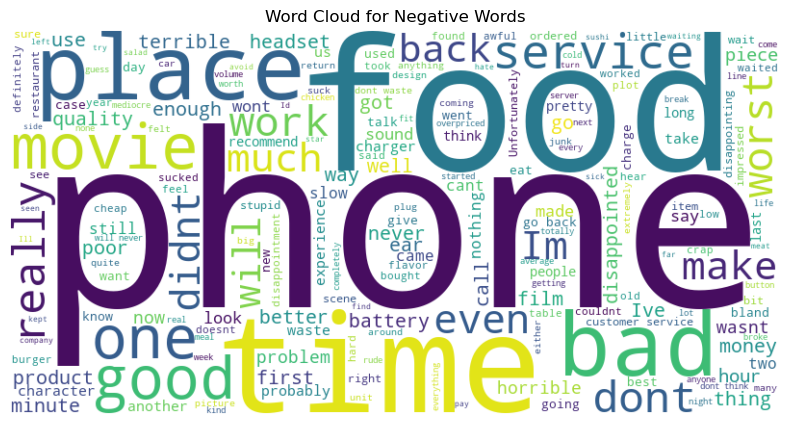

In [52]:
# Filtering the negative sentences
negative_sentences = df[df['Polarity'] == 0]['Sentence']

# Preprocessing text: Removing spaces, special characters, punctuation, and errors
preprocessed_text = ' '.join(negative_sentences)
preprocessed_text = re.sub(r'[^a-zA-Z\s]', '', preprocessed_text)

# Generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(preprocessed_text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Words')
plt.show()

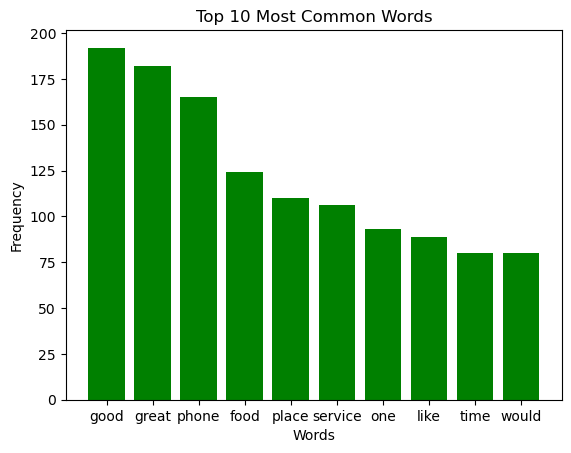

In [54]:
# Tokenizing words in each sentence and remove special characters, spaces, and punctuation
stop_words = set(nltk.corpus.stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)  # Remove punctuation

df['Tokenized_Sentence'] = df['Sentence'].apply(lambda x: [word.translate(translator).lower() for word in word_tokenize(x) if word.lower() not in stop_words and word.isalnum()])

# Flattened the list of tokenized words
all_words = [word for words in df['Tokenized_Sentence'] for word in words]

# Counting word frequencies
word_counts = Counter(all_words)

# Plotting the word frequency distribution
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

plt.bar(words, counts, color='green')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Counting the occurrences of each sentence
sentence_counts = Counter(df['Sentence'])

# Finding the top 10 most frequently used sentences
top_10_sentences = sentence_counts.most_common(20)

# showing the result
print("Top 10 Most Frequently Used Sentences:")
for idx, (sentence, count) in enumerate(top_10_sentences, 1):
    print(f"{idx}. Sentence: {sentence}")
    print(f"   Total Count: {count}")
    print()

Top 10 Most Frequently Used Sentences:
1. Sentence: I love this place.
   Total Count: 2

2. Sentence: I won't be back.
   Total Count: 2

3. Sentence: The food was terrible.
   Total Count: 2

4. Sentence: I would not recommend this place.
   Total Count: 2

5. Sentence: Works great!.
   Total Count: 2

6. Sentence: If you like a loud buzzing to override all your conversations, then this phone is for you!
   Total Count: 2

7. Sentence: Don't buy this product.
   Total Count: 2

8. Sentence: Great phone!.
   Total Count: 2

9. Sentence: Works great.
   Total Count: 2

10. Sentence: Great Phone.
   Total Count: 2

11. Sentence: This is a great deal.
   Total Count: 2

12. Sentence: Excellent product for the price.
   Total Count: 2

13. Sentence: Does not fit.
   Total Count: 2

14. Sentence: Great phone.
   Total Count: 2

15. Sentence: Definitely worth checking out.  
   Total Count: 2

16. Sentence: Wow... Loved this place.
   Total Count: 1

17. Sentence: Crust is not good.
   Tota

# Most Frequent Negative Reviews for Recommendations 

In [60]:
# Filtering out the dataset for negative polarity
negative_sentences = df[df['Polarity'] == 0]['Sentence']

# Counting the occurrences of each sentence in negative polarity
negative_sentence_counts = Counter(negative_sentences)

# Finding the top 10 most frequently used sentences in negative polarity
top_10_negative_sentences = negative_sentence_counts.most_common(15)

# Displaying the result
print("Top 5 Most Frequently Used Sentences from Negative Polarity:")
for idx, (sentence, count) in enumerate(top_10_negative_sentences, 1):
    print(f"{idx}. Sentence: {sentence}")
    print(f"   Total Count: {count}")
    print()

Top 5 Most Frequently Used Sentences from Negative Polarity:
1. Sentence: I won't be back.
   Total Count: 2

2. Sentence: The food was terrible.
   Total Count: 2

3. Sentence: I would not recommend this place.
   Total Count: 2

4. Sentence: If you like a loud buzzing to override all your conversations, then this phone is for you!
   Total Count: 2

5. Sentence: Don't buy this product.
   Total Count: 2

6. Sentence: Does not fit.
   Total Count: 2

7. Sentence: Crust is not good.
   Total Count: 1

8. Sentence: Not tasty and the texture was just nasty.
   Total Count: 1

9. Sentence: Now I am getting angry and I want my damn pho.
   Total Count: 1

10. Sentence: Honeslty it didn't taste THAT fresh.)
   Total Count: 1

11. Sentence: The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
   Total Count: 1

12. Sentence: Would not go back.
   Total Count: 1

13. Sentence: The cashier had no care what so ever on what I had to say 

In [13]:
# Downloading NLTK resources 
nltk.download('punkt')

# Assuming df is your DataFrame and 'Sentence' is the column containing sentences
sentences = df['Sentence']

# Tokenizing each sentence
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

# Calculating the length of each tokenized sentence
sentence_lengths = [len(tokens) for tokens in tokenized_sentences]

# Calculating the average sentence length
average_sentence_length = sum(sentence_lengths) / len(sentence_lengths)

# Displaying the result
print(f"Average Sentence Length: {average_sentence_length:.2f} words")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average Sentence Length: 12.84 words


# Model Implementation 

Accuracy: 0.8020833333333334

Confusion Matrix:
[[204  53]
 [ 42 181]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       257
           1       0.77      0.81      0.79       223

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



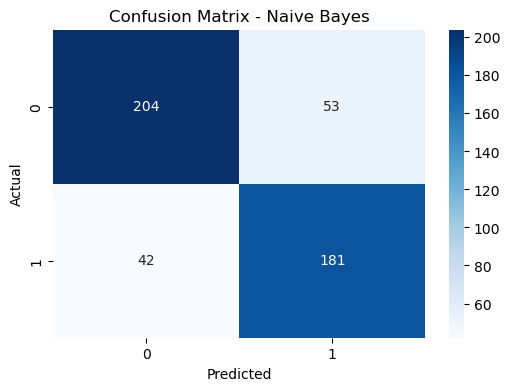

In [49]:
# Tokenizing words in each sentence and remove special characters, spaces, and punctuation
stop_words = set(nltk.corpus.stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)  # Remove punctuation

df['Tokenized_Sentence'] = df['Sentence'].apply(lambda x: [word.translate(translator).lower() for word in word_tokenize(x) if word.lower() not in stop_words and word.isalnum()])

# Separate features (X) and target variable (y)
X = [' '.join(words) for words in df['Tokenized_Sentence']]
y = df['Polarity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing the training data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# Training a Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vec, y_train)

# Vectorizing the testing data
X_test_vec = vectorizer.transform(X_test)

# Make predictions
y_pred = naive_bayes.predict(X_test_vec)
# Separate predictions into positive and negative categories


# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print('\nConfusion Matrix:')
print(conf_matrix)
print("Classification Report:\n", report)


negative_predictions = [X_test[i] for i in range(len(y_pred)) if y_pred[i] == 0]

# Displaying the negative predictions in a table
negative_result_table = pd.DataFrame({
    'Sentence': negative_predictions,
    'Predicted Polarity': [0] * len(negative_predictions)  # Set the predicted polarity to 0 for negative predictions
})

#Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


# Reviews where  Model predicted wrong

In [64]:
# Comparing y_pred with y_test to find wrong predictions
wrong_predictions_indices = [i for i in range(len(y_pred)) if y_pred[i] != y_test.iloc[i]]

# Extracting wrong predictions from X_test using the indices
wrong_predictions = [X_test[i] for i in wrong_predictions_indices]

# Creating a DataFrame for wrong predictions
wrong_predictions_table = pd.DataFrame({
    'Sentence': wrong_predictions,
    'Actual Polarity': y_test.iloc[wrong_predictions_indices],
    'Predicted Polarity': y_pred[wrong_predictions_indices]
})
top_5_sentences = wrong_predictions_table.head(30)


print("Top 10 Sentences:")
print(tabulate(top_5_sentences[['Sentence', 'Actual Polarity','Predicted Polarity']], headers='keys', tablefmt='pretty'))

Top 10 Sentences:
+------+------------------------------------------------------------------------------------+-----------------+--------------------+
|      |                                      Sentence                                      | Actual Polarity | Predicted Polarity |
+------+------------------------------------------------------------------------------------+-----------------+--------------------+
| 855  |                     fella got huevos rancheros look appealing                      |        0        |         1          |
| 2019 |              structure film easily tightly constructed history cinema              |        1        |         0          |
| 1198 |                                 pleather case fit                                  |        0        |         1          |
| 1316 |                               gotten lot compliments                               |        1        |         0          |
| 1790 |                                       want